In [36]:
#Start with importing the basic libraries for data cleaning python and numpy
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", None)

In [37]:
path = r"C:\Users\HP\Desktop\UI\important\Data Science\movie-success-prediction\data\processed\cleaned_movies_data.csv"
df = pd.read_csv(path)
df.head()


,name,imdb_id,year,ratings,vote_count,movie_duration,movie_certification,genre
0,Superman,tt5950044,2025,7.2,305000,129,12A,Action
1,One Battle After Another,tt30144839,2025,8.5,15000,161,15,Action
2,Demon Slayer: Kimetsu no Yaiba Infinity Castle,tt32820897,2025,8.6,37000,155,15,Action
3,KPop Demon Hunters,tt14205554,2025,7.6,79000,95,PG,Action
4,F1,tt16311594,2025,7.8,214000,155,12A,Action


In [38]:
#EDA
#Basic statistics
df.describe()

,year,ratings,vote_count,movie_duration
count,17647.000000,17647.000000,1.764700e+04,17647.000000
mean,1998.821273,6.545645,5.554154e+04,107.513628
std,25.459724,1.061613,1.506785e+05,389.117664
min,1897.000000,1.000000,5.000000e+00,20.000000
25%,1985.000000,6.000000,1.100000e+03,90.000000
50%,2009.000000,6.600000,6.600000e+03,100.000000
75%,2018.000000,7.300000,4.200000e+04,115.000000
max,2025.000000,9.900000,3.100000e+06,51420.000000


In [45]:
#define a function that can return outliers:
def return_outliers(df, col):
    #defining 25th and 75th percentile and iqr
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - iqr
    upper_limit = q3 + iqr
    col_outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    return col_outliers.head(10).sort_values(by = "movie_duration")
return_outliers(df, "movie_duration")

#I applied it on movie duration column using : return_outliers(df, "movie_duration"), this was to check if the 51,420 minutes output was not an error, which it wasn't.

,name,imdb_id,year,ratings,vote_count,movie_duration,movie_certification,genre
23,Inception,tt1375666,2010,8.8,2700000,148,12A,Action
20,Lokah Chapter One: Chandra,tt33372494,2025,8.1,9000,151,15,Action
22,The Dark Knight,tt0468569,2008,9.1,3100000,152,12A,Action
2,Demon Slayer: Kimetsu no Yaiba Infinity Castle,tt32820897,2025,8.6,37000,155,15,Action
4,F1,tt16311594,2025,7.8,214000,155,12A,Action
33,Baaghi 4,tt6203702,2025,2.4,7000,157,15,Action
1,One Battle After Another,tt30144839,2025,8.5,15000,161,15,Action
10,Mission: Impossible - The Final Reckoning,tt9603208,2025,7.2,165000,169,12A,Action
21,Mirai,tt30858568,2025,8.1,6300,169,15,Action
35,The Batman,tt1877830,2022,7.8,896000,176,15,Action


In [40]:
#Average, minimum, maximum, and count rating per genre
describe_rating_genre = df.groupby("genre").agg(
    Average_Rating=("ratings", "mean"),
    Minimum_Rating=("ratings", "min"),
    Median_rating=("ratings", "median"),
    Maximum_Rating=("ratings", "max"),
    Genre_Count=("ratings", "count")
).reset_index().sort_values(by = "Average_Rating", ascending=False)

describe_rating_genre.head()


,genre,Average_Rating,Minimum_Rating,Median_rating,Maximum_Rating,Genre_Count
17,News,7.272707,2.9,7.4,9.6,894
6,Documentary,7.172961,1.7,7.3,9.8,1128
7,Drama,7.033270,2.7,7.2,9.3,523
11,Game-Show,6.980000,3.2,7.7,8.6,5
3,Biography,6.944115,2.5,7.0,9.0,1317


In [ ]:
#Average, minimum, maximum, and count vote count per genre
describe_votes_genre = df.groupby("genre").agg(
    Average_vote_count=("vote_count", "mean"),
    Minimum_vote_count=("vote_count", "min"),/),
    Maximum_vote_count=("vote_count", "max"),
    Genre_Count=("vote_count", "count")
).reset_index().sort_values(by="Average_vote_count", ascending=False)

describe_votes_genre.head()


,genre,Average_vote_count,Minimum_vote_count,Median_vote_count,Maximum_vote_count,Genre_Count
0,Action,226230.987618,24,138000.0,3100000,1373
7,Drama,210107.738050,37,120000.0,3100000,523
1,Adventure,156851.815547,95,74000.0,2400000,759
4,Comedy,138535.737986,31,93000.0,1300000,874
5,Crime,117610.863281,37,49500.0,2500000,768


In [42]:
#ALter realized I could have created a function for it too
#Average, minimum, maximum, and count movie duration per genre
describe_votes_genre = df.groupby("genre").agg(
    Average_movie_duration=("movie_duration", "mean"),
    Minimum_movie_duration=("movie_duration", "min"),
    Median_movie_duration=("movie_duration", "median"),
    Maximum_movie_duration=("movie_duration", "max"),
    Genre_Count=("movie_duration", "count")
).reset_index().sort_values(by="Average_movie_duration", ascending=False)

describe_votes_genre.head()


,genre,Average_movie_duration,Minimum_movie_duration,Median_movie_duration,Maximum_movie_duration,Genre_Count
6,Documentary,142.050532,32,92.0,51420,1128
12,History,121.900602,51,116.0,335,664
7,Drama,119.879541,46,117.0,374,523
3,Biography,117.936978,45,114.0,467,1317
15,Musical,116.987382,46,107.0,398,951


In [43]:
df.head()

,name,imdb_id,year,ratings,vote_count,movie_duration,movie_certification,genre
0,Superman,tt5950044,2025,7.2,305000,129,12A,Action
1,One Battle After Another,tt30144839,2025,8.5,15000,161,15,Action
2,Demon Slayer: Kimetsu no Yaiba Infinity Castle,tt32820897,2025,8.6,37000,155,15,Action
3,KPop Demon Hunters,tt14205554,2025,7.6,79000,95,PG,Action
4,F1,tt16311594,2025,7.8,214000,155,12A,Action


In [44]:
print(df["movie_certification"].unique())

['12A' '15' 'PG' 'R' 'U' 'Series' '18' 'Not Rated' '12' 'PG-13' 'AA' 'A'
 'TV-MA' 'X' 'TV-PG' 'Rejected' '(Banned)' '16' '9+' 'Approved' 'TV-14'
 '6+' 'Unrated' 'TV-Y7-FV' 'E10+' '13+' 'TV-Y7' '16+' 'G' 'All' 'TV-G'
 '18+' 'TV-Y' '0+' 'Passed' '14+' 'E' 'Teen' '7+' 'N/C 12+' 'GP' 'TV-13'
 'Mature' 'M/PG']


In [ ]:
#group by year
#This doesn't give much insight into the data, as there are years with just one movie entry.
df.groupby("year")["ratings"].describe().sort_values(by="mean", ascending=False).head()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1920,1.0,8.000000,NaN,8.0,8.00,8.00,8.0,8.0
1924,5.0,7.780000,0.356371,7.2,7.70,7.90,8.0,8.1
1916,1.0,7.700000,NaN,7.7,7.70,7.70,7.7,7.7
1922,3.0,7.666667,0.115470,7.6,7.60,7.60,7.7,7.8
1921,4.0,7.500000,0.391578,7.1,7.25,7.45,7.7,8.0


In [ ]:
# Weighted Rating (IMDb style)
def weighted_rating(x, m=None, C=None):
    v = x['vote_count']
    R = x['ratings']
    if m is None:
        m = df['vote_count'].quantile(0.80)  # top 20% vote threshold
    if C is None:
        C = df['ratings'].mean()
    return (v/(v+m) * R) + (m/(v+m) * C)

# Apply Weighted Rating
m = df['vote_count'].quantile(0.80)
C = df['ratings'].mean()
df['weighted_rating'] = df.apply(lambda x: weighted_rating(x, m, C), axis=1)


In [52]:
df.head()

,name,imdb_id,year,ratings,vote_count,movie_duration,movie_certification,genre,weighted_rating
0,Superman,tt5950044,2025,7.2,305000,129,12A,Action,7.089455
1,One Battle After Another,tt30144839,2025,8.5,15000,161,15,Action,6.926364
2,Demon Slayer: Kimetsu no Yaiba Infinity Castle,tt32820897,2025,8.6,37000,155,15,Action,7.313434
3,KPop Demon Hunters,tt14205554,2025,7.6,79000,95,PG,Action,7.136383
4,F1,tt16311594,2025,7.8,214000,155,12A,Action,7.518225


In [54]:
#Setting style, paletter and figure size
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams['figure.figsize'] = (10, 6)

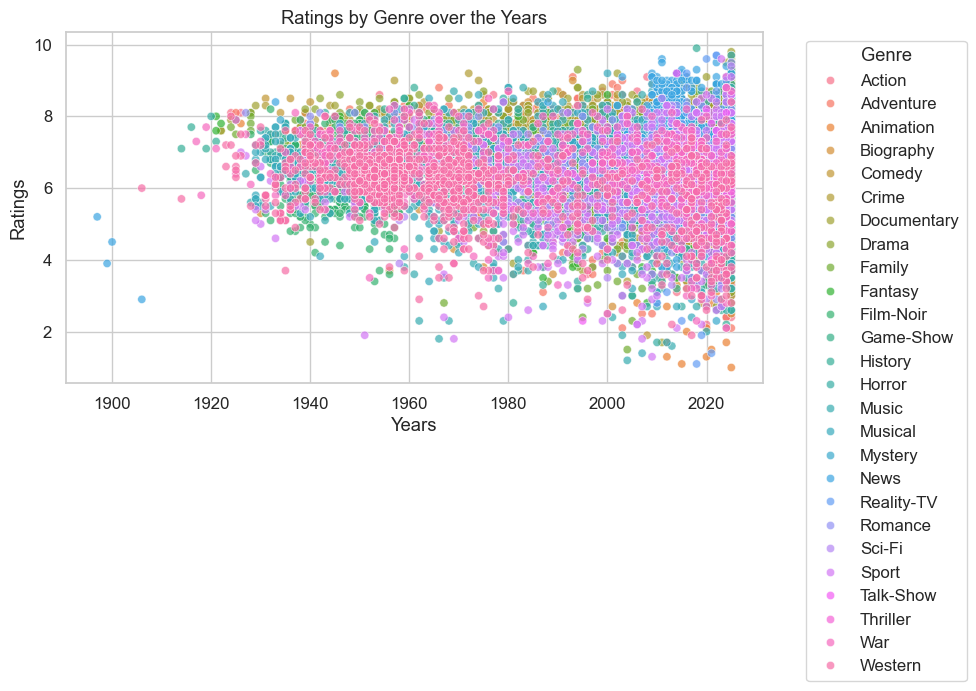

In [86]:
#plot ratings, year on genre
sns.scatterplot(x="year", y="ratings", data=df, hue="genre", alpha = 0.7)
plt.title("Ratings by Genre over the Years")
plt.xlabel("Years")
plt.ylabel("Ratings")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

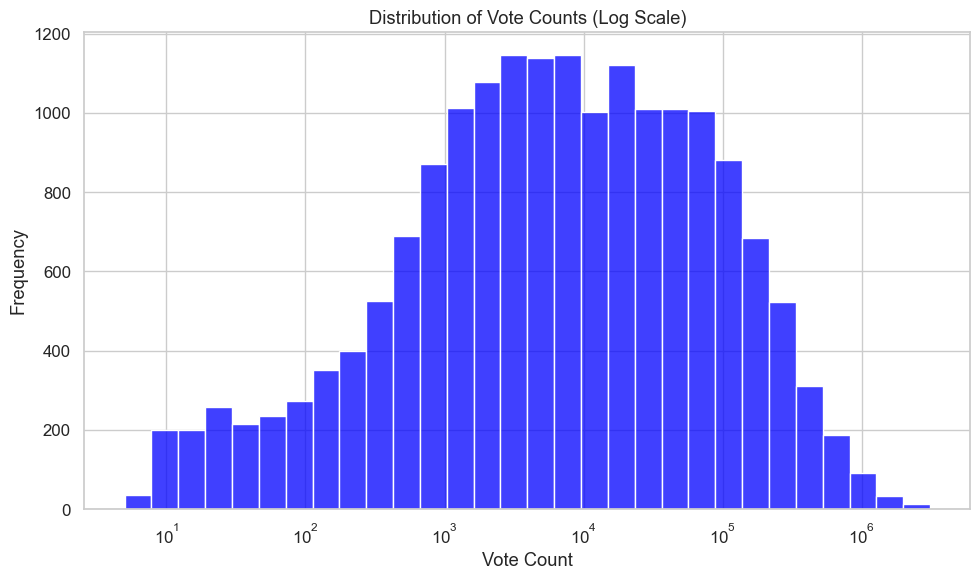

In [69]:
sns.histplot(df['vote_count'], bins=30, log_scale=True, color='blue')
plt.title("Distribution of Vote Counts (Log Scale)")
plt.xlabel("Vote Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


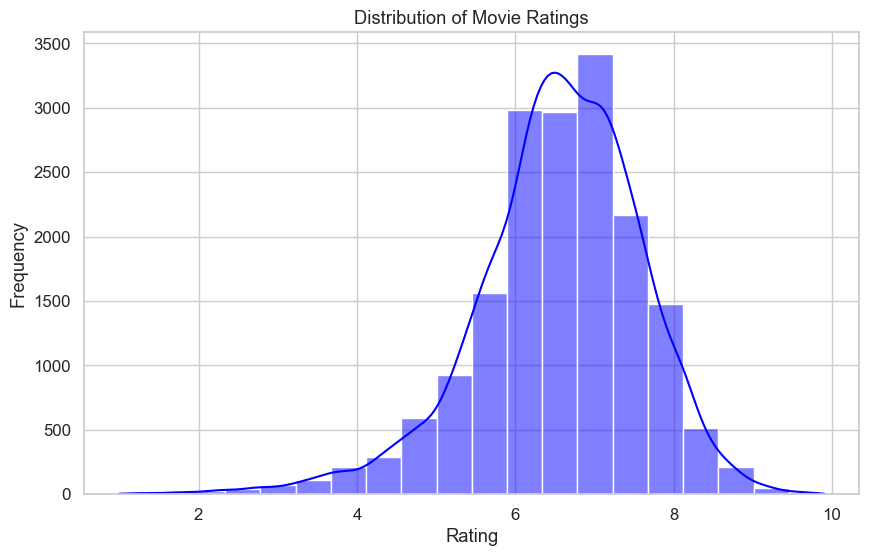

In [ ]:
sns.histplot(df['ratings'], bins=20, kde=True, color='blue')
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


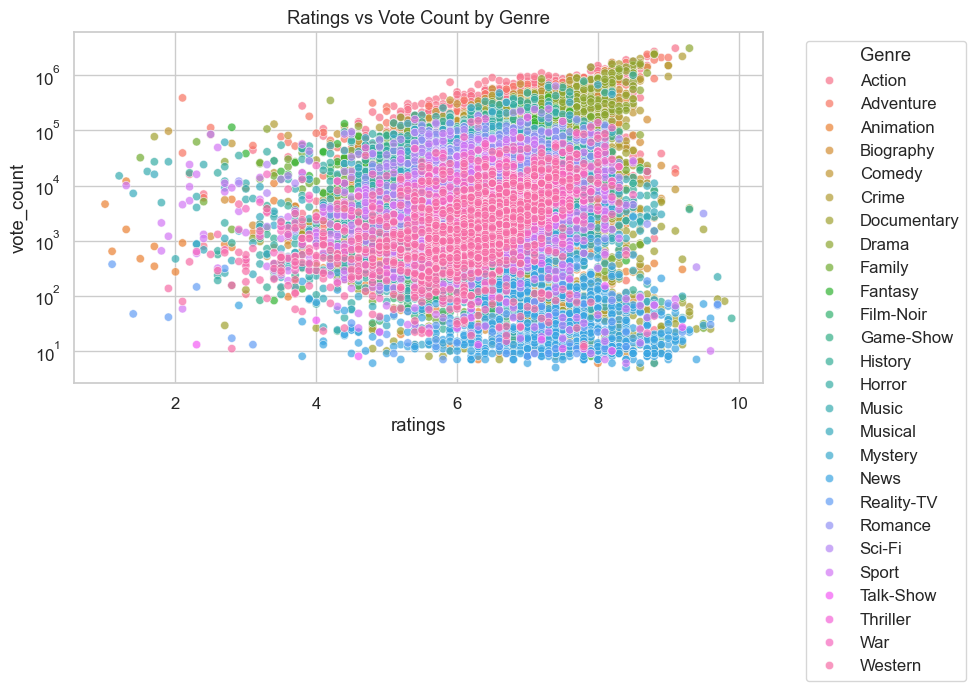

In [71]:
sns.scatterplot(x="ratings", y="vote_count", hue="genre", data=df, alpha=0.7)
plt.title("Ratings vs Vote Count by Genre")
plt.yscale("log")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

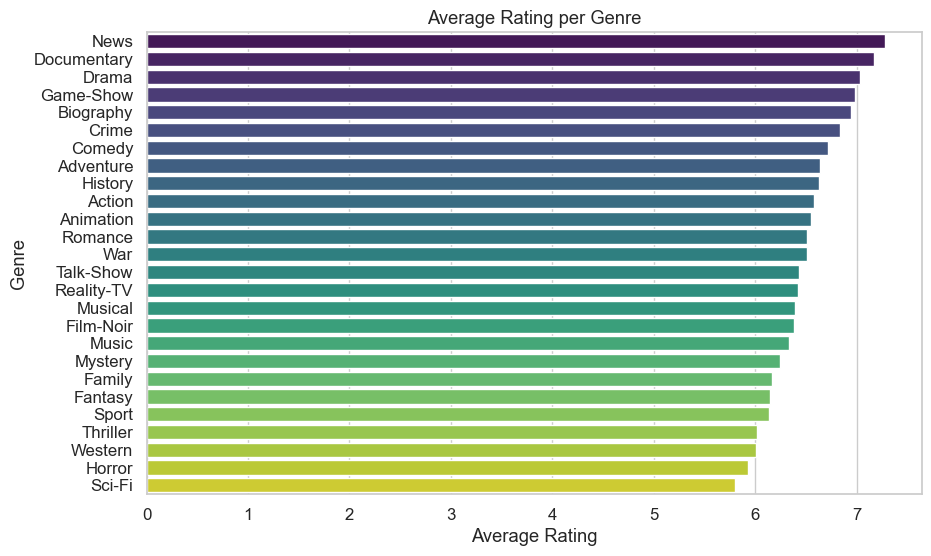

In [ ]:
genre_rating = df.groupby("genre")['ratings'].mean().sort_values(ascending=False)
sns.barplot(x=genre_rating.values, y=genre_rating.index, hue=genre_rating.index, palette="viridis", legend=False)
plt.title("Average Rating per Genre")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


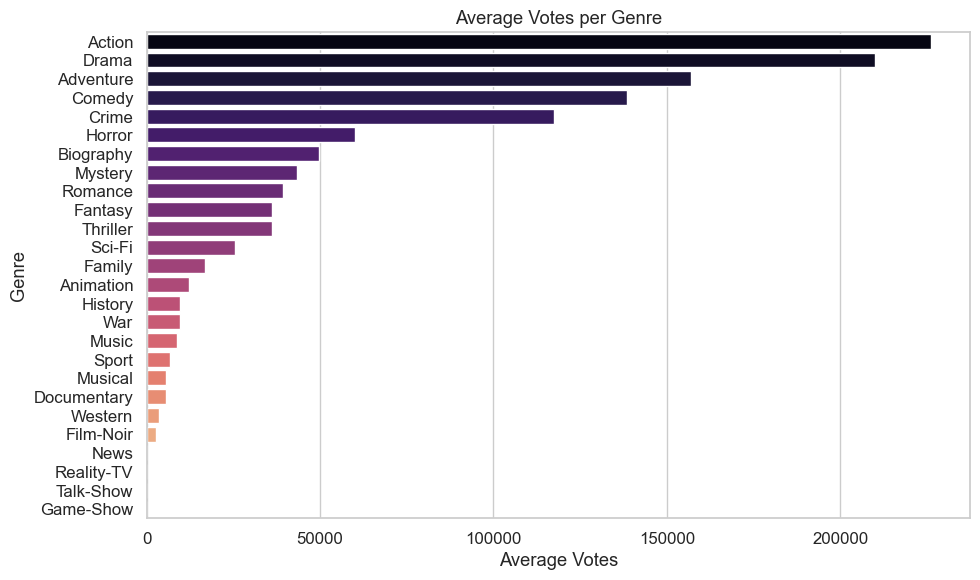

In [76]:
genre_votes = df.groupby("genre")['vote_count'].mean().sort_values(ascending=False)
sns.barplot(x=genre_votes.values, y=genre_votes.index, hue=genre_votes.index, palette="magma", legend=False)
plt.title("Average Votes per Genre")
plt.xlabel("Average Votes")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


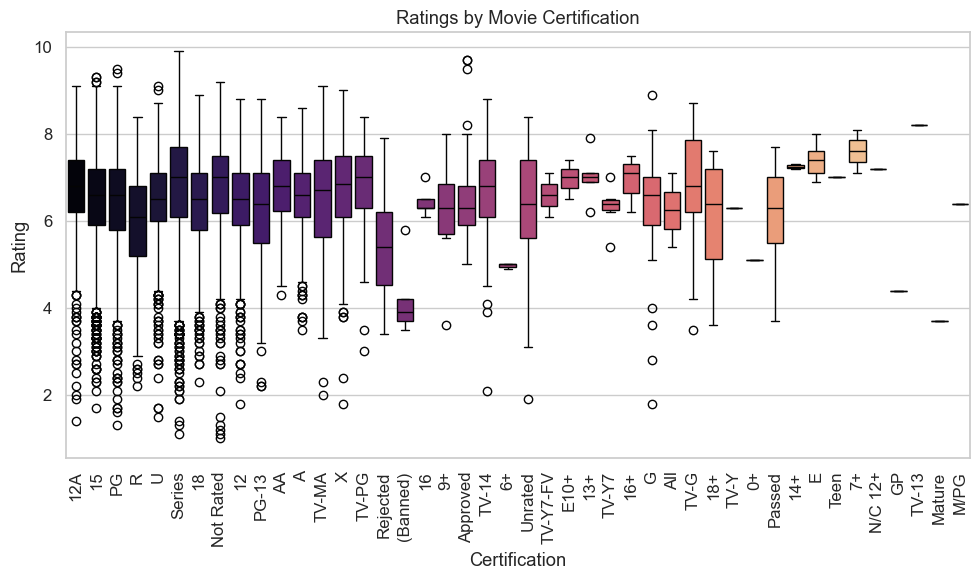

In [81]:
sns.boxplot(x="movie_certification", y="ratings", data=df,hue="movie_certification", palette="magma")
plt.title("Ratings by Movie Certification")
plt.xlabel("Certification")
plt.ylabel("Rating")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


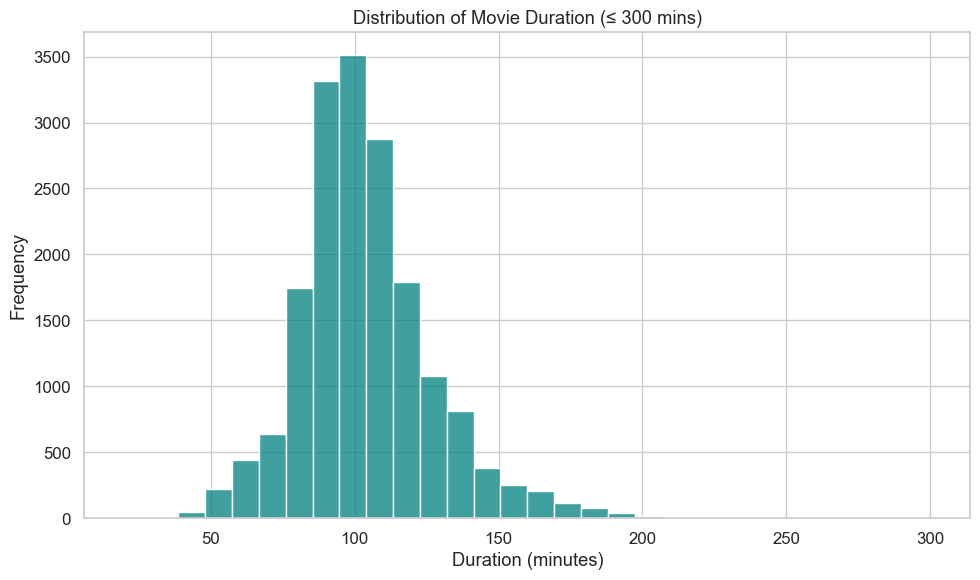

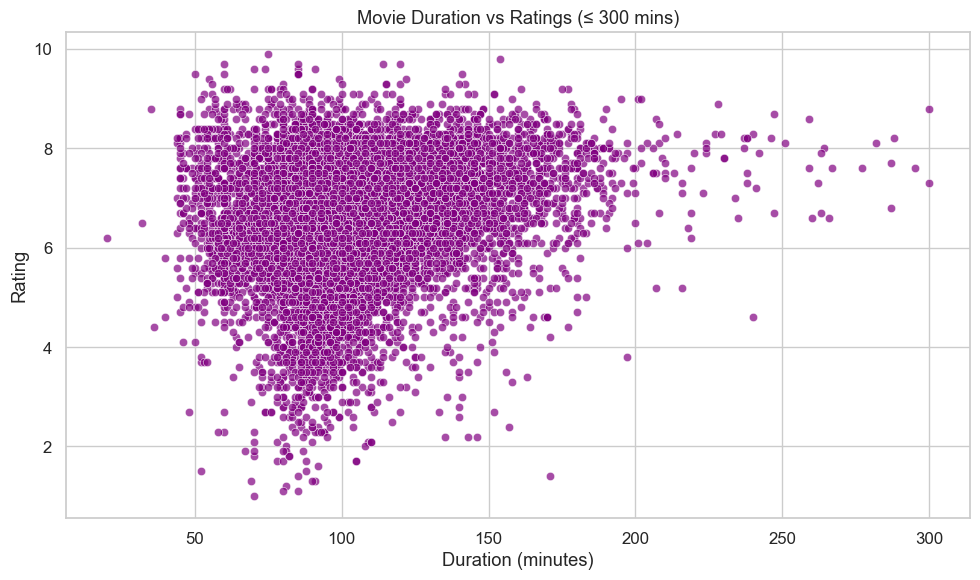

In [92]:
# Histogram of movie durations (only <= 300 minutes for clarity)
sns.histplot(df[df['movie_duration'] <= 300]['movie_duration'], bins=30, color="teal")
plt.title("Distribution of Movie Duration (≤ 300 mins)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Scatter plot (cap at 300 minutes for clarity)
sns.scatterplot(x="movie_duration", y="ratings", data=df[df['movie_duration'] <= 300],
                alpha=0.7, color="purple")
plt.title("Movie Duration vs Ratings (≤ 300 mins)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()


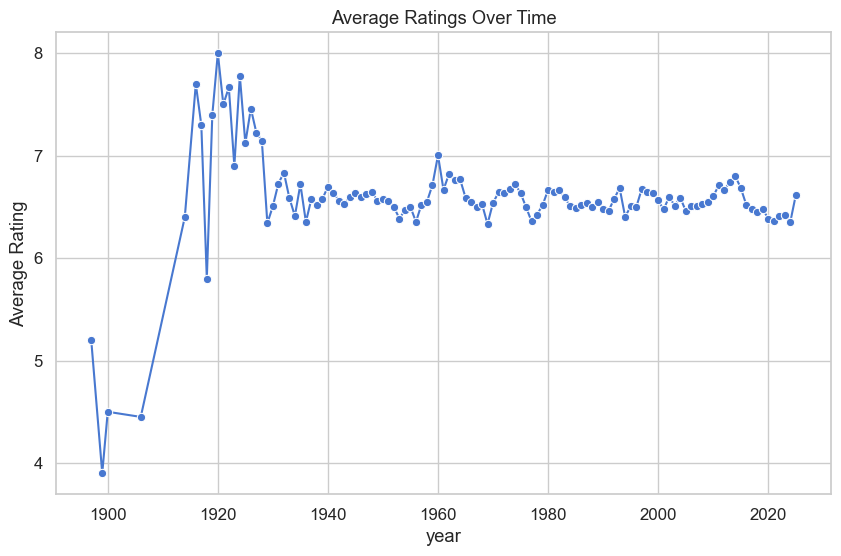

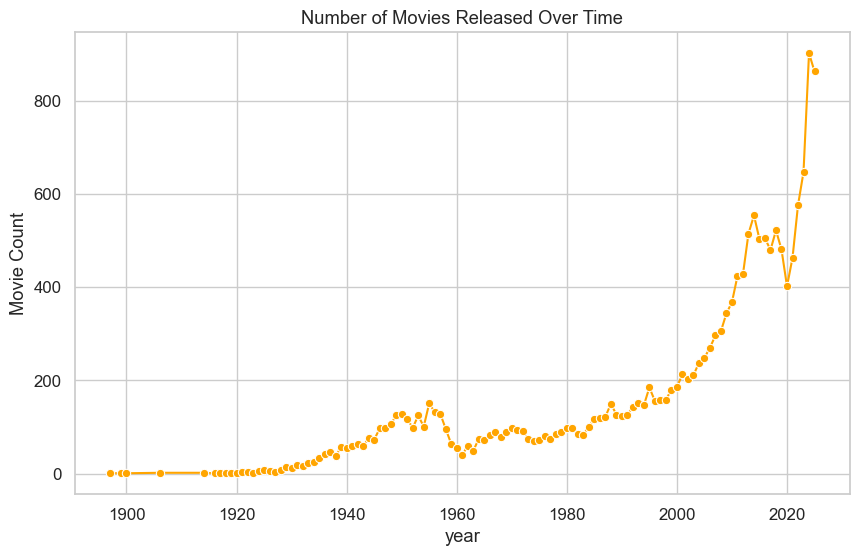

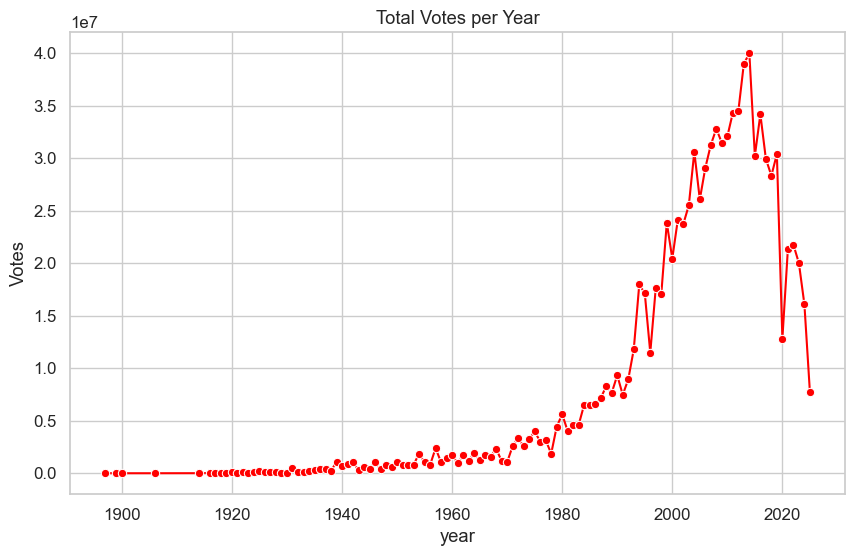

In [89]:
yearly = df.groupby("year").agg({
    "ratings":"mean",
    "vote_count":"sum",
    "name":"count"
}).rename(columns={"name":"movie_count"}).reset_index()

# Average Rating per Year
sns.lineplot(x="year", y="ratings", data=yearly, marker="o")
plt.title("Average Ratings Over Time")
plt.ylabel("Average Rating")
plt.show()

# Movie Count per Year
sns.lineplot(x="year", y="movie_count", data=yearly, marker="o", color="orange")
plt.title("Number of Movies Released Over Time")
plt.ylabel("Movie Count")
plt.show()

# Vote Count per Year
sns.lineplot(x="year", y="vote_count", data=yearly, marker="o", color="red")
plt.title("Total Votes per Year")
plt.ylabel("Votes")
plt.show()


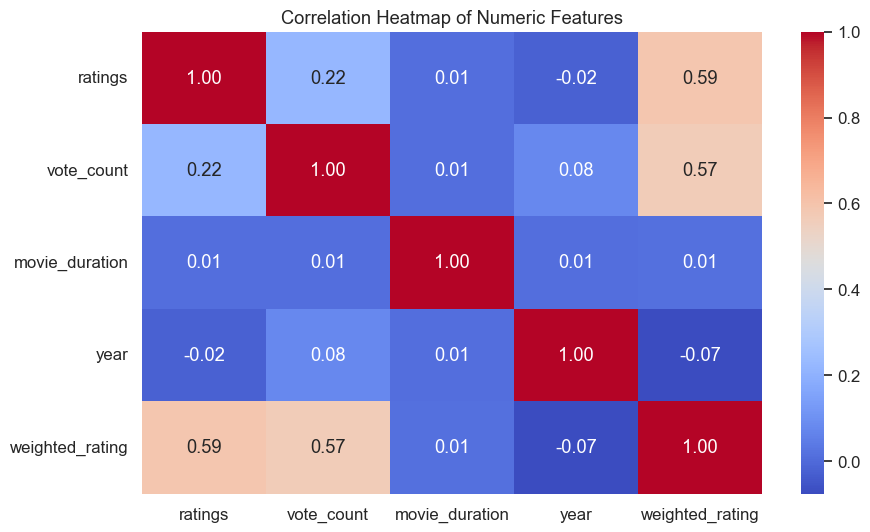

In [90]:
num_cols = ['ratings', 'vote_count', 'movie_duration', 'year', 'weighted_rating']
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


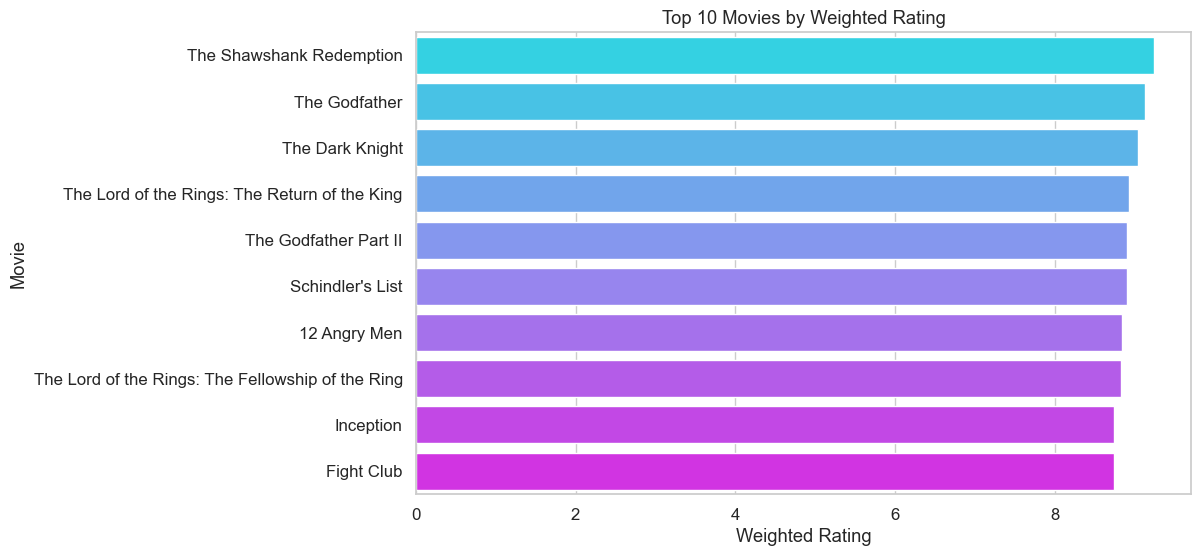

In [94]:
top10 = df.sort_values("weighted_rating", ascending=False).head(10)
sns.barplot(x="weighted_rating", y="name", data=top10, hue="name", palette="cool")
plt.title("Top 10 Movies by Weighted Rating")
plt.xlabel("Weighted Rating")
plt.ylabel("Movie")
plt.show()


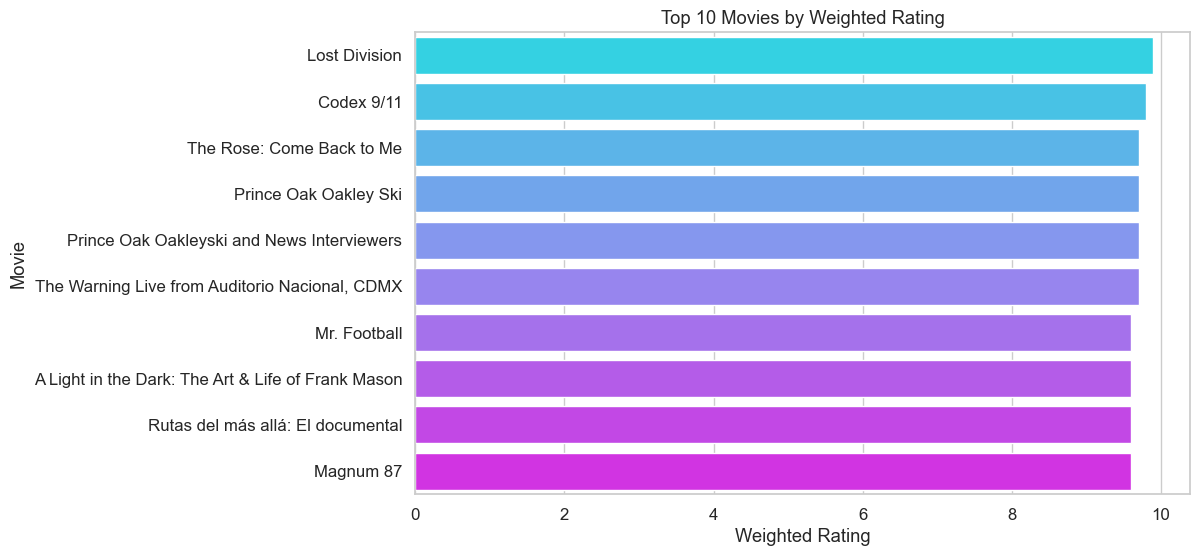

In [95]:
#top 10 movies by rating
top_10 = df.sort_values("ratings", ascending=False).head(10)
sns.barplot(x="ratings", y="name", data=top_10, hue="name", palette="cool")
plt.title("Top 10 Movies by Weighted Rating")
plt.xlabel("Weighted Rating")
plt.ylabel("Movie")
plt.show()
